In [13]:
import random

import matplotlib.pyplot as plt
import numpy as np
import mcu
import cylinder_dataset_generator as cyl
from importlib import reload

reload(mcu)
reload(cyl)

<module 'cylinder_dataset_generator' from 'C:\\Users\\einkina\\Documents\\School\\Manifold Learning\\manifold-learning\\cylinder_dataset_generator.py'>

In [72]:
reload(cyl)
control_vars = cyl.get_control_vars(700)
response_matrix = cyl.generate_array_of_cylinders(control_vars, noise_level=0.5, num_points=700)
k = 6
c = 400
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, response_matrix, k)
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

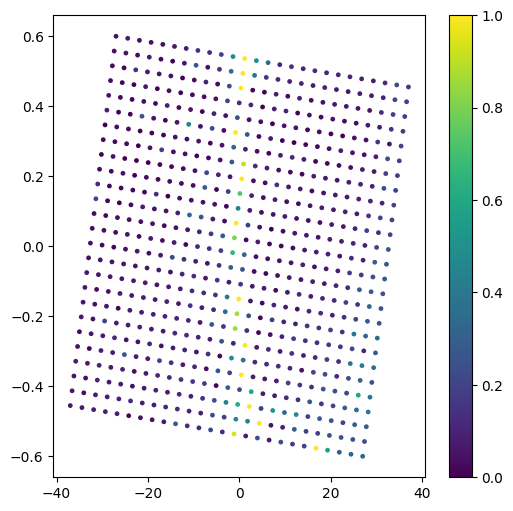

0.0807644876279068


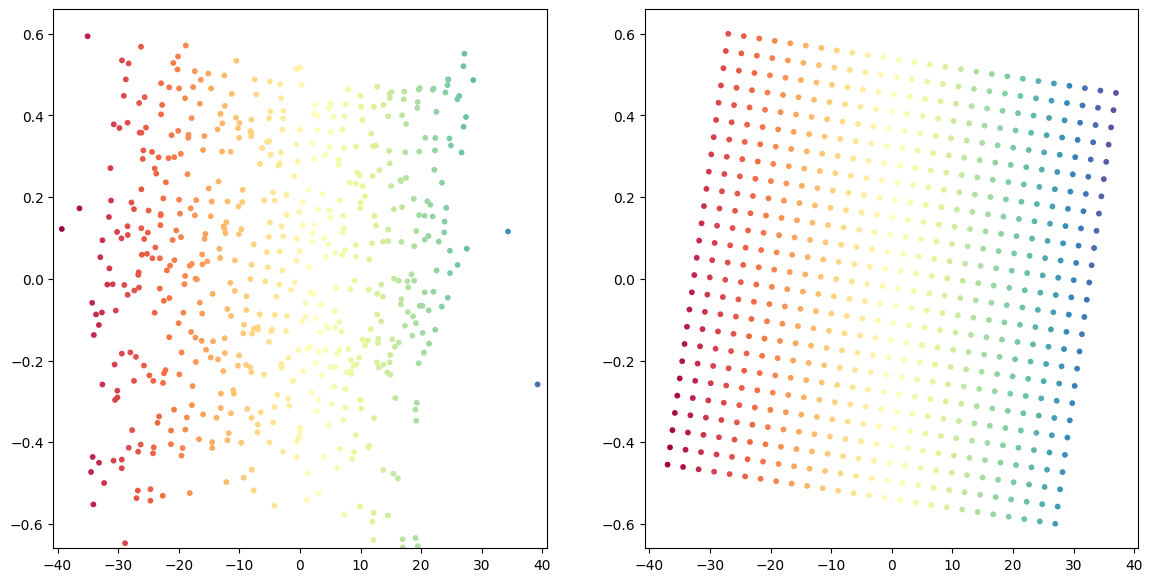

In [73]:
ld_embedding = mcu.reduce_dimensions(q)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = mcu.compute_rre(ld_embedding, reconstructed_y)
mcu.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
mcu.plot_two_embeddings(ld_embedding, reconstructed_y)

In [75]:
reload(cyl)
test_control_vars = cyl.get_random_control_vars(1000)
test_rolls = cyl.generate_array_of_cylinders(test_control_vars, noise_level=0.5, num_points=700)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = mcu.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler, k)
    x_opt = x_opt * x_stds + x_means
    # x_err = 0
    # x_opt = (random.random()*10, random.random()*10)
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [8.28653511 8.44397758], x_err = 4.072060988481215e-14
x_real = [5.16533405789694, 8.786240373543443]
-----------
x_opt  = [5.90144822 8.72857227], x_err = 1.5032049167149646e-14
x_real = [2.5558720383448383, 8.408113394845486]
-----------
x_opt  = [8.82978281 8.95194812], x_err = 2.8726482189014995e-14
x_real = [1.0566805671739787, 9.45152033818025]
-----------
x_opt  = [8.31966022 7.7632749 ], x_err = 4.481901312546006e-14
x_real = [8.66232038039817, 7.284711870006176]
-----------
x_opt  = [8.80789505 8.48018988], x_err = 4.973674569458054e-14
x_real = [9.196259535754551, 8.364731108734514]
-----------
x_opt  = [8.65969394 8.67151889], x_err = 4.1664672368653975e-14
x_real = [9.736870982819696, 8.013645128085612]
-----------
x_opt  = [4.78893154 6.38181334], x_err = 4.679511866980485e-14
x_real = [2.7225443947736636, 6.545426351267839]
-----------
x_opt  = [7.48134236 3.83932741], x_err = 1.8043991788323684e-15
x_real = [9.076956159859002, 2.1373667341637237]
---

[3.1399108  3.36088886 7.78913929 0.58859031 0.4051638  1.26218393
 2.07285433 2.33294953 1.90439627 0.88422116 6.71106486 3.62145744
 0.3618881  0.82921036 1.00451239 0.76526    4.14463703 0.83310666
 0.51389952 2.56513731 2.35773005 4.55300717 6.30108911 2.87952763
 4.2704587  0.55803695 4.75747111 3.01878726 6.69449889 3.75527988
 8.72975903 2.24261337 4.8139205  3.90251861 6.67480255 2.99705318
 2.68741298 0.36312234 3.71212296 2.38599361 1.66142623 3.13167335
 4.72210462 1.04562659 4.76681494 2.30233385 2.15153985 5.0794532
 4.69799512 1.33721496 1.8208138  0.46472136 0.88478447 0.24276276
 2.05191885 2.78473789 3.9631729  2.82834275 6.29659928 2.46102934
 1.44952935 3.28735945 1.06784179 1.77261719 3.88996435 1.91656037
 1.2939598  4.40327354 1.2529077  2.13339459 1.05338817 3.114612
 2.69716919 6.09268708 0.46644953 1.55959725 4.2821231  0.87286554
 5.38249661 6.56400615 5.65191583 0.49334813 0.53969693 0.31415379
 0.30078129 1.84313135 3.99947236 0.72394138 4.9127539  2.2822866

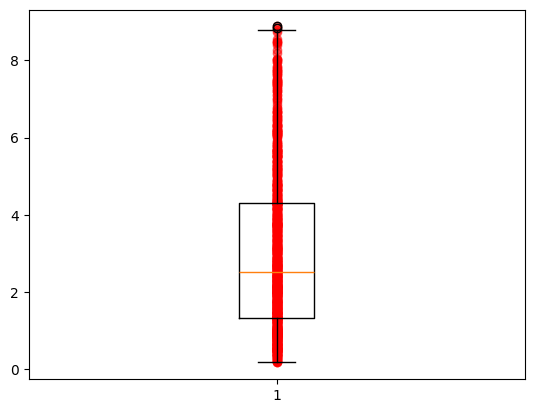

In [76]:
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")

In [42]:
mcu.k

3